<a href="https://colab.research.google.com/github/gino79445/hellish-IWT-memes-classifier/blob/main/meme_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/meme

/content/drive/.shortcut-targets-by-id/1aibTqO_wb7Xr-G1eFwzixqn-9EtxNxkq/Colab Notebooks/meme


In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
plt.ion()   # interactive mode
#os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"
from torchvision.models.resnet import Bottleneck
import torchvision.models as models
import math
import torch.utils.model_zoo as model_zoo
from gensim.models import word2vec
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

data process
-------------------------------

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('./training/label_meme.csv')
# df=df.sample(frac=1.0)
# df.to_csv("meme_npy_val/label.csv", index=False)

# np.save( "meme_npy_val/df.npy" ,df )
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       5169 non-null   object
 1   class    5169 non-null   int64 
 2   context  4697 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB
None
                          id  class  \
0  memes_lead_you_to_hell257      1   
1          mybosseatshit1883      1   
2            mybosseatshit69      1   
3          innersoulwrite243      0   
4        success_for_rich190      0   

                                             context  
0                                 我想開設襄家這樣的店」你們想開啥)?  
1                          翻了翻衣櫃發現雙十一買的衣服已經配不上雙十二的我了  
2  兄弟,我女友懷孕了門跟你億點錢沒問題,3萬塊夠嗎?還是4萬?我剛匯5萬去你戶頭了@MYBOS...  
3                   經常不斷學習,你就什麼都知道。什麼都知道的人,是很有力量的人。S  
4                       在生活中你該學習的重要一課就是在出狀況時「如何保持冷靜」  


In [ ]:
df = np.load("meme_npy_val/df.npy",allow_pickle=True)
print(df)


[['mybosseatshit1010' 1
  '訪(@yzyangdel我希鹿我能跟我一樣愛笑的人結婚想像一下我們倆因為都忘了去學校接小孩然後一直笑不停']
 ['successfuljewish_official36' 0
  '如果每天都能進步一點點,日積月累,就會有巨大的改變。很多事情看著很難,但只要你勇敢去行動,就總能找到解決的方案。學會化解焦慮、不要拖延、療於變通、懂得珍惜、堅持學習、學會拒絕、敢於改變、減少依賴、保持專注,這9種能力希望你能養成。願你把生活過成自己想要的樣子FaBET']
 ['duncan_design61' 0 nan]
 ...
 ['mybosseatshit806' 1 '當你討厭的人以為他們可以若無其事地回到你的生活中']
 ['mybosseatshit526' 1 '一眼就可以發現,誰是主角團裡的人']
 ['banai_design349' 0
  '1{侖吃是收不住的齋熏碑喲把證扯給油流汪、~一送另吻垢來點的一一瞪鄉三角洲也要記得司乾當!應陸|3M點式牙昌吧360”專和螺旋設計則門當潔費纖焉角方便缸榮,一次性合用,更舔?生、一刷頭初貿柔軟,呵護牙廳。']]


In [ ]:
from pandas import Series,DataFrame

clas = df['class']
clas_np = clas.values
print(type(clas_np) )
print(clas_np.shape)   #(10222,)

#種類數
clas_set = set(clas_np)
print(len(clas_set))   

#編號與名稱對應字典：
clas_list = list(clas_set)
dic = {}
for i in range(2):
    dic[  clas_list[i]   ] = i
print(dic)

<class 'numpy.ndarray'>
(5169,)
2
{0: 0, 1: 1}


In [ ]:
file =  df["id"].values
print(file.shape)
from random import shuffle
import os
file = [i+".jpg" for i in file]

file = [os.path.join("./training/train",i) for i in file ]
file_train1 = file[:4000]
file_test1 = file[4000:]
file_train2 = file[:3000] + file[4001:]
file_test2 = file[3000:4000]
file_train3 = file[:2000] + file[3001:]
file_test3 = file[2000:3000]
file_train4 = file[:1000] + file[2001:]
file_test4 = file[1000:2000]
file_train5 = file[1001:]
file_test5 = file[0:1000]

np.save( "meme_npy_val/file_train1.npy" ,file_train1 )
np.save( "meme_npy_val/file_test1.npy" ,file_test1 )
np.save( "meme_npy_val/file_train2.npy" ,file_train2 )
np.save( "meme_npy_val/file_test2.npy" ,file_test2 )
np.save( "meme_npy_val/file_train3.npy" ,file_train3 )
np.save( "meme_npy_val/file_test3.npy" ,file_test3 )
np.save( "meme_npy_val/file_train4.npy" ,file_train4 )
np.save( "meme_npy_val/file_test4.npy" ,file_test4 )
np.save( "meme_npy_val/file_train5.npy" ,file_train5 )
np.save( "meme_npy_val/file_test5.npy" ,file_test5 )

(5169,)


In [ ]:
clas = df["class"].values
# print(clas)
number = []
for i in range(5169):
  # print(clas[i])
  number.append(  dic[ clas[i] ]  )
# number = np.array(number) 
print(number)

number_train1 = number[:4000]
number_test1 = number[4000:]
number_train2 = number[:3000] + number[4001:]
number_test2 = number[3000:4000]
number_train3 = number[:2000] + number[3001:]
number_test3 = number[2000:3000]
number_train4 = number[:1000] + number[2001:]
number_test4 = number[1000:2000]
number_train5 = number[1001:]
number_test5 = number[0:1000]

np.save( "meme_npy_val/number_train1.npy" ,number_train1 )
np.save( "meme_npy_val/number_test1.npy" ,number_test1 )
np.save( "meme_npy_val/number_train2.npy" ,number_train2 )
np.save( "meme_npy_val/number_test2.npy" ,number_test2 )
np.save( "meme_npy_val/number_train3.npy" ,number_train3 )
np.save( "meme_npy_val/number_test3.npy" ,number_test3 )
np.save( "meme_npy_val/number_train4.npy" ,number_train4 )
np.save( "meme_npy_val/number_test4.npy" ,number_test4 )
np.save( "meme_npy_val/number_train5.npy" ,number_train5 )
np.save( "meme_npy_val/number_test5.npy" ,number_test5 )

[1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 

In [ ]:
file =  df["id"].values
print(file.shape)
from random import shuffle
import os
file = [i+".npy" for i in file]

file = [os.path.join("./context_bert_meme",i) for i in file ]
print(file)
# np.load('my_array.npy')
l = []
for i in file:
  n =np.load(i)
  l.append(n)
  # print(n)


context_train1 = l[:4000]
context_test1 = l[4000:]
context_train2 = l[:3000] + l[4001:]
context_test2 = l[3000:4000]
context_train3 = l[:2000] + l[3001:]
context_test3 = l[2000:3000]
context_train4 = l[:1000] + l[2001:]
context_test4 = l[1000:2000]
context_train5 = l[1001:]
context_test5 = l[0:1000]

np.save( "meme_npy_val/context.npy" ,l)
np.save( "meme_npy_val/context_train1.npy" ,context_train1 )
np.save( "meme_npy_val/context_test1.npy" ,context_test1 )
np.save( "meme_npy_val/context_train2.npy" ,context_train2 )
np.save( "meme_npy_val/context_test2.npy" ,context_test2 )
np.save( "meme_npy_val/context_train3.npy" ,context_train3 )
np.save( "meme_npy_val/context_test3.npy" ,context_test3 )
np.save( "meme_npy_val/context_train4.npy" ,context_train4 )
np.save( "meme_npy_val/context_test4.npy" ,context_test4 )
np.save( "meme_npy_val/context_train5.npy" ,context_train5 )
np.save( "meme_npy_val/context_test5.npy" ,context_test5 )




(5169,)
['./context_bert_meme/memes_lead_you_to_hell257.npy', './context_bert_meme/mybosseatshit1883.npy', './context_bert_meme/mybosseatshit69.npy', './context_bert_meme/innersoulwrite243.npy', './context_bert_meme/success_for_rich190.npy', './context_bert_meme/hell_fun_www38.npy', './context_bert_meme/mybosseatshit2306.npy', './context_bert_meme/success_for_rich155.npy', './context_bert_meme/mybosseatshit207.npy', './context_bert_meme/innersoulwrite210.npy', './context_bert_meme/plainlaw.me50.npy', './context_bert_meme/hell_meme_ig45.npy', './context_bert_meme/innersoulwrite39.npy', './context_bert_meme/success_for_rich300.npy', './context_bert_meme/mybosseatshit15.npy', './context_bert_meme/hell_fun_www52.npy', './context_bert_meme/banai_design217.npy', './context_bert_meme/duncan_design181.npy', './context_bert_meme/plainlaw.me228.npy', './context_bert_meme/success_for_rich70.npy', './context_bert_meme/mybosseatshit747.npy', './context_bert_meme/duncan_design342.npy', './context_be

Layer
-----------------------------------

In [ ]:
class MEMECLASS(nn.Module):
 
    def __init__(self, block, layers, num_classes=2):
        self.inplanes = 64
        super(MEMECLASS, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        # self.avgpool = nn.AvgPool2d(7, stride=1)
        # # #新增一個反捲積層
        # # self.convtranspose1 = nn.ConvTranspose2d(2048, 2048, kernel_size=3, stride=1, padding=1, output_padding=0, groups=1, bias=False, dilation=1)
        # # #新增一個最大池化層
        # # self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        # #去掉原來的fc層，新增一個fclass層
        # self.fclass = nn.Linear(2048, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(2816, 100)
        self.dropout = nn.Dropout(p=0.5)  # dropout训练
        # self.fc2 = nn.Linear(11, 2)
        # for m in self.modules():
        #     if isinstance(m, nn.Conv2d):
        #         n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        #         m.weight.data.normal_(0, math.sqrt(2. / n))
        #     elif isinstance(m, nn.BatchNorm2d):
        #         m.weight.data.fill_(1)
        #         m.bias.data.zero_()
        self.relu1 = nn.ReLU()
        self.bn11 = nn.BatchNorm1d(100 )
        self.fc2 = nn.Linear(100,400,bias=True)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(400)
        self.fc3 = nn.Linear(400,200,bias=True)
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm1d(200)
        self.fc4 = nn.Linear(200,2,bias =True)
        self.sigmoid = nn.Sigmoid()
 
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )
 
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
 
        return nn.Sequential(*layers)
 
    def forward(self, x,y):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
 
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
 
        x = self.avgpool(x)
        #新加層的forward
        # x = x.view(x.size(0), -1)
        # x = self.convtranspose1(x)
        # x = self.maxpool2(x)
        # x = x.view(x.size(0), -1)
        # x = self.fclass(x)
        
        
        x = torch.flatten(x, 1)
        # y.resize_(x.size(dim = 0), 1) 
        # y = y.to(torch.float)
        # x = torch.cat([x,y],1) # concatenate two tensor according to second dimension
        
        # y = torch.mean(y,1)
        # print(y.size())
        y = y.to(torch.float)

        x = torch.cat([x,y],1) # concatenate two tensor according to second dimension
        
        # print(y)
        
        x = self.fc(x)
        x = self.relu1(x)
        # x = self.dropout(x)
        x = self.bn11(x)
        x = self.fc2(x)
        x = self.relu2(x)
        # x = self.dropout(x)
        x = self.bn2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        # x = self.dropout(x)
        x = self.bn3(x)
        x = self.fc4(x)
        x = self.sigmoid(x)
        

        return x


          

def train_model(model, criterion, device, dataloaders, dataset_sizes, optimizer, scheduler, num_epochs=25):
    since = time.time()
    # 
   
    # 

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_loss, valid_loss = [], []
    train_acc, valid_acc = [], []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            FN =0.0      

            FP =0.0

            TP =0.0  
            TN =0.0
            # Iterate over data.
            for inputs, labels ,contexts in dataloaders[phase]:
                # print(inputs)
                # print(labels)
                # print(phase)
                # print(comment)
                # print()
               
               
                inputs = inputs.to(device)
                labels = labels.to(device)
                contexts = contexts.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):

                    outputs = model(inputs,contexts)
                    # print(outputs)
                    val, preds = torch.max(outputs, 1)
                    # print(preds)
                      
                    loss = criterion(outputs, labels)
                    # =======================
                    # print(labels.data)
                    # zes=(torch.zeros(len(labels.data)).type(torch.LongTensor))#全0变量
                    # zes=zes.to(device)
                    # ons=(torch.ones(len(labels.data)).type(torch.LongTensor))#全1变量
                    # ons=ons.to(device)
                    # train_correct01 = ((preds==ons)&(labels.data==zes)).sum() #原标签为T，预测为 F 的总数

                    # train_correct10 = ((preds==zes)&(labels.data==ons)).sum() #原标签为F，预测为 T 的总数

                    # train_correct11 = ((preds==zes)&(labels.data==zes)).sum()
                    
                    # train_correct00 = ((preds==ons)&(labels.data==ons)).sum()

                    zes=(torch.zeros(len(labels.data)).type(torch.LongTensor))#全0变量
                    zes=zes.to(device)
                    ons=(torch.ones(len(labels.data)).type(torch.LongTensor))#全1变量
                    ons=ons.to(device)
                    train_correct01 = ((preds==zes)&(labels.data==ons)).sum() #原标签为T，预测为 F 的总数

                    train_correct10 = ((preds==ons)&(labels.data==zes)).sum() #原标签为F，预测为 T 的总数

                    train_correct11 = ((preds==ons)&(labels.data==ons)).sum()
                    
                    train_correct00 = ((preds==zes)&(labels.data==zes)).sum()

                    # ======================================
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        # zero the parameter gradients
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                FN += train_correct01.item()       

                FP += train_correct10.item()

                TP += train_correct11.item() 
                TN += train_correct00.item()
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            
           
            if phase == 'train':
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                valid_loss.append(epoch_loss)
                valid_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            if phase == 'val':
              print('TP'+str(TP)+' TN'+str(TN)+' FP'+str(FP)+' FN'+str(FN))
              print("accuracy"+str((TP +TN)/ (TP+TN+FP+FN)))
              print("precision:"+str(TP/ (TP+FP)))
              print("recall:"+str(TP/ (TP+FN)))
              print("F1:"+str(2*TP/ (2*TP+FP+FN)))
              # print("F1:"+str(2*(TP/ (TP+FP))*(TP/ (TP+FN))/ ((TP/ (TP+FP))+(TP/ (TP+FN)))))
            # print(train_correct/dataset_sizes[phase])
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                


    plt.figure(0)
    plt.plot(range(1,num_epochs+1,1), np.array(train_loss), 'r-', label= "train loss") #relative global step
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    # plt.savefig(f"./meme_train_loss.png")
    # torch.save(model, 'meme_model.pkl')  # save entire net

    plt.figure(1)
    plt.plot(range(1,num_epochs+1,1), np.array(valid_loss), 'b-', label= "eval loss") #--evaluate_during_training True 在啟用eval
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    # plt.savefig(f"./meme_eval_loss.png")

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    #torch.save(model.state_dict(),"model.pt")
    return model

def visualize_model(model, device, dataloaders, class_names, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    plt.figure(figsize=(18,9))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1

                img_display = np.transpose(inputs.cpu().data[j].numpy(), (1,2,0)) #numpy:CHW, PIL:HWC
                plt.subplot(num_images//2,2,images_so_far),plt.imshow(img_display) #nrow,ncol,image_idx
                plt.title(f'predicted: {class_names[preds[j]]}')
                plt.savefig("test.jpg")
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    #原先Normalize是對每個channel個別做 減去mean, 再除上std
    inp1 = std * inp + mean

    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.imshow(inp1)
    if title is not None:
        plt.title(title)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

Validation1
------------------------------------

cuda:0
#parameters:23912134
batch_size:32
Epoch 1/5
----------
train Loss: 0.4903 Acc: 0.8802
val Loss: 0.3878 Acc: 0.9598
TP600.0 TN522.0 FP30.0 FN17.0
accuracy0.9597946963216424
precision:0.9523809523809523
recall:0.9724473257698542
F1:0.9623095429029671
Epoch 2/5
----------
train Loss: 0.3680 Acc: 0.9703
val Loss: 0.3577 Acc: 0.9718
TP598.0 TN538.0 FP14.0 FN19.0
accuracy0.9717707442258341
precision:0.9771241830065359
recall:0.9692058346839546
F1:0.9731489015459723
Epoch 3/5
----------
train Loss: 0.3442 Acc: 0.9818
val Loss: 0.3457 Acc: 0.9795
TP609.0 TN536.0 FP16.0 FN8.0
accuracy0.979469632164243
precision:0.9744
recall:0.9870340356564019
F1:0.9806763285024155
Epoch 4/5
----------
train Loss: 0.3324 Acc: 0.9925
val Loss: 0.3395 Acc: 0.9846
TP612.0 TN539.0 FP13.0 FN5.0
accuracy0.9846022241231822
precision:0.9792
recall:0.9918962722852512
F1:0.9855072463768116
Epoch 5/5
----------
train Loss: 0.3262 Acc: 0.9945
val Loss: 0.3349 Acc: 0.9872
TP611.0 TN543.0 FP9.0 FN6.0
accuracy0.987168

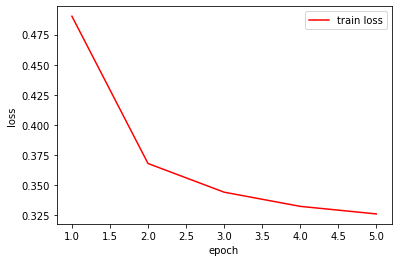

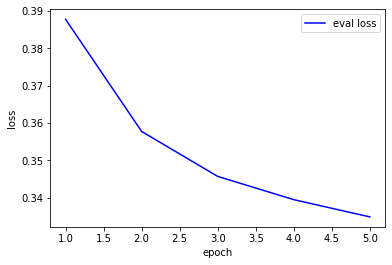

In [ ]:
context_train = np.load("meme_npy_val/context_train1.npy")
context_test = np.load("meme_npy_val/context_test1.npy")
file_train = np.load("meme_npy_val/file_train1.npy")
file_test = np.load("meme_npy_val/file_test1.npy")
number_train = np.load("meme_npy_val/number_train1.npy")
number_test = np.load("meme_npy_val/number_test1.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 5
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = MEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 



Validation2
------------------------------------


cuda:0


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#parameters:23912134
batch_size:32
Epoch 1/5
----------
train Loss: 0.4958 Acc: 0.8707
val Loss: 0.3801 Acc: 0.9680
TP527.0 TN441.0 FP15.0 FN17.0
accuracy0.968
precision:0.9723247232472325
recall:0.96875
F1:0.9705340699815838
Epoch 2/5
----------
train Loss: 0.3681 Acc: 0.9705
val Loss: 0.3550 Acc: 0.9760
TP525.0 TN451.0 FP5.0 FN19.0
accuracy0.976
precision:0.9905660377358491
recall:0.9650735294117647
F1:0.9776536312849162
Epoch 3/5
----------
train Loss: 0.3409 Acc: 0.9868
val Loss: 0.3421 Acc: 0.9800
TP534.0 TN446.0 FP10.0 FN10.0
accuracy0.98
precision:0.9816176470588235
recall:0.9816176470588235
F1:0.9816176470588235
Epoch 4/5
----------
train Loss: 0.3320 Acc: 0.9921
val Loss: 0.3403 Acc: 0.9820
TP533.0 TN449.0 FP7.0 FN11.0
accuracy0.982
precision:0.987037037037037
recall:0.9797794117647058
F1:0.9833948339483395
Epoch 5/5
----------
train Loss: 0.3272 Acc: 0.9940
val Loss: 0.3348 Acc: 0.9830
TP536.0 TN447.0 FP9.0 FN8.0
accuracy0.983
precision:0.9834862385321101
recall:0.98529411764

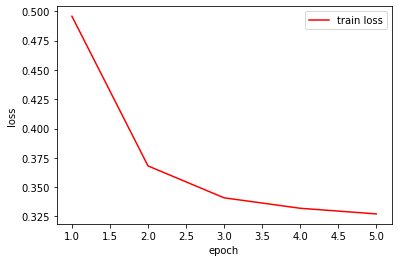

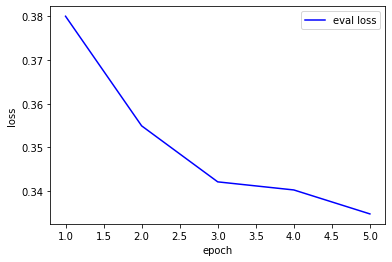

In [ ]:
context_train = np.load("meme_npy_val/context_train2.npy")
context_test = np.load("meme_npy_val/context_test2.npy")
file_train = np.load("meme_npy_val/file_train2.npy")
file_test = np.load("meme_npy_val/file_test2.npy")
number_train = np.load("meme_npy_val/number_train2.npy")
number_test = np.load("meme_npy_val/number_test2.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 5
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = MEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 


Validation3
------------------------------------

cuda:0


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#parameters:23912134
batch_size:32
Epoch 1/5
----------
train Loss: 0.4974 Acc: 0.8649
val Loss: 0.3897 Acc: 0.9580
TP479.0 TN479.0 FP29.0 FN13.0
accuracy0.958
precision:0.9429133858267716
recall:0.9735772357723578
F1:0.958
Epoch 2/5
----------
train Loss: 0.3679 Acc: 0.9671
val Loss: 0.3599 Acc: 0.9670
TP476.0 TN491.0 FP17.0 FN16.0
accuracy0.967
precision:0.9655172413793104
recall:0.967479674796748
F1:0.966497461928934
Epoch 3/5
----------
train Loss: 0.3439 Acc: 0.9834
val Loss: 0.3464 Acc: 0.9810
TP483.0 TN498.0 FP10.0 FN9.0
accuracy0.981
precision:0.9797160243407708
recall:0.9817073170731707
F1:0.9807106598984772
Epoch 4/5
----------
train Loss: 0.3310 Acc: 0.9930
val Loss: 0.3426 Acc: 0.9780
TP487.0 TN491.0 FP17.0 FN5.0
accuracy0.978
precision:0.9662698412698413
recall:0.9898373983739838
F1:0.9779116465863453
Epoch 5/5
----------
train Loss: 0.3284 Acc: 0.9940
val Loss: 0.3391 Acc: 0.9790
TP482.0 TN497.0 FP11.0 FN10.0
accuracy0.979
precision:0.9776876267748479
recall:0.97967479674

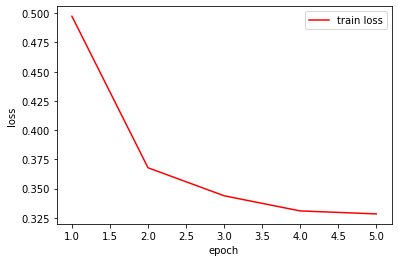

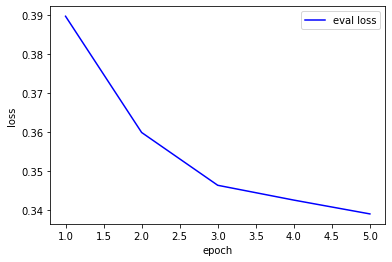

In [ ]:
context_train = np.load("meme_npy_val/context_train3.npy")
context_test = np.load("meme_npy_val/context_test3.npy")
file_train = np.load("meme_npy_val/file_train3.npy")
file_test = np.load("meme_npy_val/file_test3.npy")
number_train = np.load("meme_npy_val/number_train3.npy")
number_test = np.load("meme_npy_val/number_test3.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 5
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = MEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 


Validation4
------------------------------------

cuda:0


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#parameters:23912134
batch_size:32
Epoch 1/5
----------
train Loss: 0.4990 Acc: 0.8613
val Loss: 0.3902 Acc: 0.9620
TP482.0 TN480.0 FP15.0 FN23.0
accuracy0.962
precision:0.9698189134808853
recall:0.9544554455445544
F1:0.9620758483033932
Epoch 2/5
----------
train Loss: 0.3697 Acc: 0.9693
val Loss: 0.3582 Acc: 0.9730
TP489.0 TN484.0 FP11.0 FN16.0
accuracy0.973
precision:0.978
recall:0.9683168316831683
F1:0.9731343283582089
Epoch 3/5
----------
train Loss: 0.3420 Acc: 0.9870
val Loss: 0.3457 Acc: 0.9800
TP496.0 TN484.0 FP11.0 FN9.0
accuracy0.98
precision:0.9783037475345168
recall:0.9821782178217822
F1:0.9802371541501976
Epoch 4/5
----------
train Loss: 0.3342 Acc: 0.9914
val Loss: 0.3410 Acc: 0.9830
TP497.0 TN486.0 FP9.0 FN8.0
accuracy0.983
precision:0.9822134387351779
recall:0.9841584158415841
F1:0.9831849653808111
Epoch 5/5
----------
train Loss: 0.3260 Acc: 0.9945
val Loss: 0.3392 Acc: 0.9840
TP496.0 TN488.0 FP7.0 FN9.0
accuracy0.984
precision:0.9860834990059643
recall:0.9821782178217

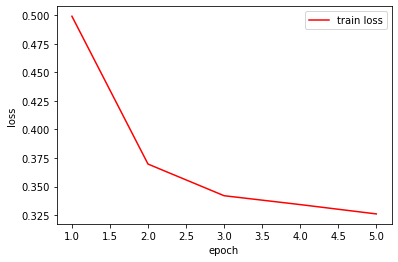

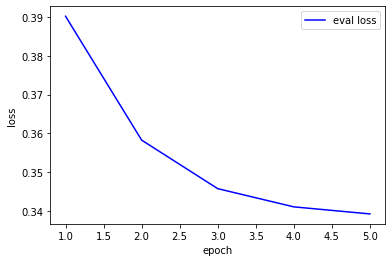

In [ ]:
context_train = np.load("meme_npy_val/context_train4.npy")
context_test = np.load("meme_npy_val/context_test4.npy")
file_train = np.load("meme_npy_val/file_train4.npy")
file_test = np.load("meme_npy_val/file_test4.npy")
number_train = np.load("meme_npy_val/number_train4.npy")
number_test = np.load("meme_npy_val/number_test4.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 5
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = MEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 


Validation5
------------------------------------

cuda:0


/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#parameters:23912134
batch_size:32
Epoch 1/5
----------
train Loss: 0.4973 Acc: 0.8644
val Loss: 0.3921 Acc: 0.9680
TP501.0 TN467.0 FP12.0 FN20.0
accuracy0.968
precision:0.9766081871345029
recall:0.9616122840690979
F1:0.9690522243713733
Epoch 2/5
----------
train Loss: 0.3673 Acc: 0.9707
val Loss: 0.3623 Acc: 0.9650
TP495.0 TN470.0 FP9.0 FN26.0
accuracy0.965
precision:0.9821428571428571
recall:0.9500959692898272
F1:0.9658536585365853
Epoch 3/5
----------
train Loss: 0.3450 Acc: 0.9846
val Loss: 0.3464 Acc: 0.9770
TP515.0 TN462.0 FP17.0 FN6.0
accuracy0.977
precision:0.9680451127819549
recall:0.9884836852207294
F1:0.9781576448243114
Epoch 4/5
----------
train Loss: 0.3328 Acc: 0.9914
val Loss: 0.3420 Acc: 0.9780
TP509.0 TN469.0 FP10.0 FN12.0
accuracy0.978
precision:0.9807321772639692
recall:0.9769673704414588
F1:0.9788461538461538
Epoch 5/5
----------
train Loss: 0.3284 Acc: 0.9942
val Loss: 0.3404 Acc: 0.9780
TP510.0 TN468.0 FP11.0 FN11.0
accuracy0.978
precision:0.9788867562380038
recal

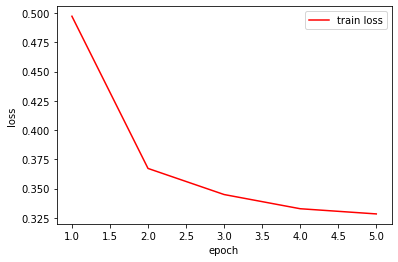

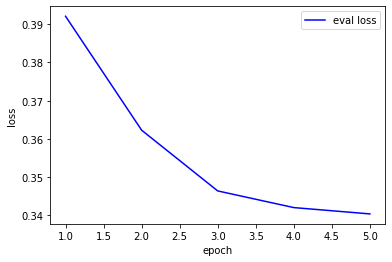

In [ ]:
context_train = np.load("meme_npy_val/context_train5.npy")
context_test = np.load("meme_npy_val/context_test5.npy")
file_train = np.load("meme_npy_val/file_train5.npy")
file_test = np.load("meme_npy_val/file_test5.npy")
number_train = np.load("meme_npy_val/number_train5.npy")
number_test = np.load("meme_npy_val/number_test5.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 5
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = MEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 


test

In [ ]:
context_train = np.load("meme_npy_val/context_train5.npy")
context_test = np.load("meme_npy_val/context_test5.npy")
file_train = np.load("meme_npy_val/file_train5.npy")
file_test = np.load("meme_npy_val/file_test5.npy")
number_train = np.load("meme_npy_val/number_train5.npy")
number_test = np.load("meme_npy_val/number_test5.npy")

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
# normalize = transforms.Normalize(
#     mean=[0.485, 0.456, 0.406],
#     std=[0.229, 0.224, 0.225]
# )
preprocess = transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

def default_loader(path):
    img_pil =  Image.open(path)
    # img_pil = img_pil.resize((224,224))
    img_tensor = preprocess(img_pil)
    return img_tensor

#tensor
class trainset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_train
        self.target = number_train
        self.context = context_train
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
class testset(Dataset):
    def __init__(self, loader=default_loader):
        #定義 image 的路徑
        self.images = file_test
        self.target = number_test
        self.context = context_test
        self.loader = loader

    def __getitem__(self, index):
        fn = self.images[index]
        img = self.loader(fn)
        target = self.target[index]
        context = self.context[index]
        return img,target,context

    def __len__(self):
        return len(self.images)
train_data  = trainset()
test_data = testset()




def main():
    num_workers = 2
    momentum = 0.9
    num_epochs = 5
    lr = 0.001
    batch_size = 32
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((256,256) ),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    data_dir = './training'
    # trainloader = DataLoader(train_data, batch_size=4,shuffle=True)
    # image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x])for x in ['train', 'val']}
    # print(train_data)
  
    dataloaders = {x: torch.utils.data.DataLoader(train_data if x=='train' else test_data, batch_size=batch_size,
                                                  shuffle=True, num_workers=2)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(train_data) if x=='train' else len(test_data)  for x in ['train', 'val']}
    # for inputs, labels ,a in dataloaders['train']:
    #   print(a)

    # print(dataloaders['train'])
    # class_names = image_datasets['train'].classes
    # txt1 = './label.txt'#圖片檔名存放txt檔案地址
    # f1 = open(txt1, 'w+',encoding='utf-8-sig')
    # for n in class_names:
    #   f1.write(n)
    #   f1.write("\n")#換行
    # f1.close()
    # print(class_names)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    # Get a batch of training data
    inputs, classes ,_= next(iter(dataloaders['train']))

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    #imshow(out, title=[class_names[x] for x in classes])
    pretrained_dict = models.resnet50(pretrained=True).state_dict()
    model_ft = MEMECLASS(Bottleneck, [3, 4, 6, 3])
    model_dict = model_ft.state_dict()
  
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict if (k in model_dict and 'fc' not in k)}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model_ft.load_state_dict(model_dict)

    # for k,v in model_dict.items():
    #   print(k)
    # for (name, layer) in model_ft._modules.items():
    #     #iteration over outer layers
    #     print(f"{name}:\n{layer}\n")

    model_ft = model_ft.to(device)
    
    
    # model =======================================================================

    parameter_count = count_parameters(model_ft)
    print(f"#parameters:{parameter_count}")
    print(f"batch_size:{batch_size}")


    criterion = nn.CrossEntropyLoss()

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=lr, momentum=momentum)

    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

    model_ft = train_model(
      model_ft, 
      criterion, 
      device, 
      dataloaders, 
      dataset_sizes, 
      optimizer_ft, 
      exp_lr_scheduler,     
      num_epochs=num_epochs
    )

    # visualize_model(model_ft, device, dataloaders, class_names)

 


if __name__ == '__main__':
    main()
 